## Looking Through Tree-Ring Data in the Southwestern USA Using Pandas

**Pandas** provides a useful tool for the analysis of tabular data in Python, where previously we would have had to use lists of lists, or use R.

In [45]:
## Bringing in necessary pckages
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats.mstats as stat


### The Data

The dataset I included herein is an example of tree growth rates at many different sites in the southwestern United States (AZ, NM). Field crews used increment borers to core into live trees in these sites and extract core samples. These were then brought back to the lab and dated to determine tree age and growth rates. I obtained this during my master's work at Northern Arizona University.

In this dataset, each individual row is a tree.
The columns are as follows:
* site: The code for either the plot name or study site at which the tree was surveyed
* center.date: The innermost ring of the tree. The closes estimate for the establishment year of the tree
* dbh: The diameter of the tree (cm) at 1.37m above ground level
* dsh: The diameter of the tree (cm) at 0.4m above ground level
* Age: Estimated age of the tree when the core was collected. $Age = inv.yr-center.date$
* spp: Four letter species code for the tree. The first two letters of the genus and species
* inv.yr: The year in which the core was collected
* BA: The basal area of the tree. Basically the surface area of the top of a stump if the tree was cut at 1.37m. Given with the formula $BA = 0.00007854 * DBH^2$
* BA/Age: Just what it sounds like
* Annual BAI: An estimate of the square centimeters of basal area produced by the tree each year. A better measure of growth than annual growth on the core as it accounts for tree size in addition to ring thickness in the core.

Similar datasets are available through the International Tree Ring Data Bank (ITRDB), and can be found on the [ITRDB Webpage](https://data.noaa.gov/dataset/international-tree-ring-data-bank-itrdb)

The following codeblock reads in the data and displays the first few rows of the pandas data frame. The path should be changed to the location of the .csv file.

In [46]:
## Change the path below if being run on a different computer
data = pd.read_csv(r"/Users/kyle/Google Drive/UC Boulder PhD Stuff/Classes/Fall 2016/Spatiotemporal Methods/Combined_BaiData.csv")
data.head()

,site,center.date,dbh,dsh,Age,spp,inv.yr,BA,BA/age,annual.bai
0,CIBS2A,1978,42.200,45.2,19,PIPO,1997,0.139867,0.007361,84.453
1,Peaks,1956,62.600,68.1,44,ABLA,2000,0.307779,0.006995,82.781
2,BM,1965,62.100,69.8,46,ABCO,2011,0.302882,0.006584,83.185
3,COCS4A,1932,72.644,81.8,72,PIPO,2004,0.414467,0.005756,72.969
4,BM,1907,83.800,89.5,104,PIPO,2011,0.551542,0.005303,60.493


In [47]:
print "There are cores for "+str(len(data))+" trees"

There are cores for 9913 trees


In [48]:
filtered_data = data.dropna()
print ("After removing rows with missing values, there are cores for "+str(len(filtered_data))+
" trees. \nSo, there were "+str(len(data)-len(filtered_data))+" rows that had NaN's")

After removing rows with missing values, there are cores for 8952 trees. 
So, there were 961 rows that had NaN's


#### A logical question may be: 

*What species is growing the fastest across the sites?*
So, we can produce a simple boxplot to help visualize this.

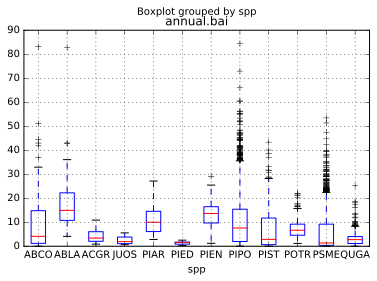

In [49]:
filtered_data.boxplot(column = 'annual.bai', by = 'spp')

It appears that *Abies lasiocarpa* - subalpine fir - may be the fastest growing species overall. We can also look at the median values for the different species to verify this

In [50]:
filtered_data.groupby('spp', as_index=False)['annual.bai'].median()

,spp,annual.bai
0,ABCO,4.1280
1,ABLA,14.9410
2,ACGR,3.3930
3,JUOS,1.9330
4,PIAR,10.0035
5,PIED,1.5950
6,PIEN,13.6570
7,PIPO,7.6180
8,PIST,2.8570
9,POTR,6.6650


In [51]:
## Adapted from http://stackoverflow.com/questions/35816865/create-vectors-for-kruskal-wallis-h-test-python
groupednumbers = {}
for grp in filtered_data['spp'].unique(): 
    groupednumbers[grp] = filtered_data['annual.bai'][filtered_data['spp']==grp].values
args = groupednumbers.values()
h,p = stat.kruskalwallis(*args)
print("The Kruskal-Wallis H-statistic is: "+str(round(h,2))+" and... \nThe p-value is: "+str(p))

The Kruskal-Wallis H-statistic is: 817.16 and... 
The p-value is: 3.91295661264e-168


So the species have very different growth rates. We could take this a step further and perform pairwise comparisons between groups using Mann-Whitney tests with Bonferroni correction for multiple comparison, but a more robust analysis would likely use mixed-effects models or partial regression to account for the different growing conditions between sites, and perhaps to account for age and tree size as additional covariates.